# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
EPSILON = 1e-8 # small constant to avoid underflow or divide per 0
%matplotlib inline

# I - Linear multidimensional regression

## I a) - Loading the data

In [2]:
data = pd.read_csv('data/linear_multi.csv', header=None)
X, Y = data.values[:, :-1], data.values[:, -1]
Y = Y.reshape((Y.shape[0], 1))

## I b) - Problem definition

We can define our MSE cost function $J(\mathbf{\theta})$ as follows:
$$
J(\mathbf{X}, \mathbf{Y}; \mathbf{\theta}) = \frac{1}{2n} \sum_{i=1}^n (Y_i - \mathbf{X_i} \mathbf{\theta})^2
= \frac{1}{2 n} \| \mathbf{Y} - \mathbf{X} \mathbf{\theta} \|_2^2,
$$
with $\mathbf{Y} = [y_1 \cdots y_n]$, $\mathbf{X} = [\mathbf{x_1} \cdots \mathbf{x_n}]$,

$\mathbf{Y} \in \mathbb{R}^{n\times{1}}$ being the vector of labels, $\mathbf{X} \in \mathbb{R}^{n\times{p}}$ being the vector of features, $\mathbf{\theta} \in \mathbb{R}^{p\times{1}}$ being our parameters, and $n$ the number of samples.

Now we can calculate the gradient $\nabla_{\mathbf{\theta}} J$:
$$
\nabla_{\mathbf{\theta}} J(\mathbf{X}, \mathbf{Y})^T = - \frac{1}{n} \sum_{i=1}^n \mathbf{X_i}(Y_i - \mathbf{X_i}\mathbf{\theta})
$$
$$
\nabla_{\mathbf{\theta}} J(\mathbf{X}, \mathbf{Y}) = - \frac{1}{n} \mathbf{X}^T(\mathbf{Y} - \mathbf{X}\mathbf{\theta})
$$

It leads us to the gradient descend (GD) iterative algorithm:
$$
\mathbf{\theta}_{t+1} := \mathbf{\theta}_{t} - \eta_t \nabla_{\mathbf{\theta}} J(\mathbf{X}, \mathbf{Y})
$$

It is common to decay the learning rate linearly until iteration $\tau$:
$$
\eta_t = (1-\alpha)\eta_0 + \alpha \eta_\tau
$$
with $\alpha = \frac{t}{\tau}$, and usually here we are going to take $\tau \approx 200$ and $\eta_\tau = \frac{\eta_0}{100}$

And finally, our linear prediction $\mathbf{\hat{Y}}$ can be expressed as:
$$
\mathbf{\hat{Y}} = \mathbf{X}\mathbf{\theta}
$$

It is also common to add regularization to the loss.

MSE loss with L1 penalty term:
$$
J(\mathbf{X}, \mathbf{Y}; \mathbf{\theta})_{pen} = J(\mathbf{X}, \mathbf{Y}; \mathbf{\theta}) + \gamma \sum_{i=1}^n \mid\mathbf{\theta}_i\mid
$$
MSE loss with L2 penalty term:
$$
J(\mathbf{X}, \mathbf{Y}; \mathbf{\theta})_{pen} = J(\mathbf{X}, \mathbf{Y}; \mathbf{\theta}) + \gamma \sum_{i=1}^n \mathbf{\theta}_i^2
$$

- **You are asked, wherever there are TODO expressions, to change the default expression by the right one**
- **Most expressions you are asked to implement can be found in the introduction above**

In [3]:
class LinearRegressor():
    def __init__(self, X, Y, penalization=None):
        # Number of features 
        p = X.shape[1]
        self.theta = np.random.normal(0, 1, p).reshape((p, 1))
        self.grad_theta = None
        self.training_losses_history = []
        self.validation_losses_history = []
        self.X_tr, self.X_val, self.Y_tr, self.Y_val = self.split_train_validation(X, Y)
        self.penalization = penalization
        # Gamma here initialized to None, set to actual value in fit function
        self.gamma = None
        
    def split_train_validation(self, X, Y, test_size=0.25, seed=False):
        random_state = 42 if seed else np.random.randint(1e3)
        X_tr, X_val, Y_tr, Y_val = train_test_split(X, Y, test_size=test_size, random_state=random_state)
        return X_tr, X_val, Y_tr, Y_val
    
    # Must return the linear prediction given X
    def predict(self, X):
        # TODO:
        Y_hat = np.dot(X,self.theta)
        return Y_hat
    
    # Must return the gradient, penalized or not, of the given loss
    def compute_grad(self, X, Y, loss='MSE'):
        """Least-squares gradient"""
        assert(X.shape[0] == Y.shape[0])
        n = X.shape[0]
        if loss == 'MSE':
            # Here define the gradient of the given MSE loss
            # TODO:
            grad = -(1/n)* np.dot(X.T,( Y- self.predict(X) ))
            
            if self.penalization == 'l2':
                # Here add to your current gradient the gradient of the l2 penalization term
                # TODO:
                grad += self.gamma * 2 * self.theta
            if self.penalization == 'l1':
                # Here add to your current gradient the gradient of the l1 penalization term
                # TODO:
                grad += self.gamma*np.sign( self.theta )
        else:
            raise NotImplementedError

        return grad
    
    # Call the gradient computation function with the used loss and proceed to a gradient descent step
    # Use the parameter step as learning rate (êta_t in above gradient descent formula)
    def step_gradient_descent(self, step, X, Y):
        self.grad_theta = self.compute_grad(X, Y, loss='MSE')
        # TODO:
        self.theta -= step*self.grad_theta
        
    # Must return the given loss, penalized or not, for Y_true and Y_pred as inputs
    def loss(self, Y_true, Y_pred, loss='MSE'):
        """Least-squares loss"""
        assert(Y_true.shape[0] == Y_pred.shape[0])
        n = Y_true.shape[0]
        if loss == 'MSE':
            # TODO:           
            #loss = ( 1 / (2*n) ) * np.sum( (Y_true-Y_pred)**2 , axis=0 )
            loss = (1 / (2*n))*(np.linalg.norm(Y_true-Y_pred, ord=2))**2
            if self.penalization == 'l2':
                # Reminder: l2 penalization is the sum of the square parameters
                # TODO:
                loss += self.gamma * np.linalg.norm(self.theta, ord=2)**2
            elif self.penalization == 'l1':
                # Reminder: l1 penalization is the sum of the absolute parameters
                # TODO:
                loss += self.gamma * np.linalg.norm(self.theta, ord=1 )
        else:
            raise NotImplementedError
        return loss
    
    def loss_history_flush(self):
        self.training_losses_history = []
        self.validation_losses_history = []
    
    # Step decay strategy, the idea is to have a step value that fluctuates with k until the tau value
    # Return the step value for iteration k
    def apply_step_decay(self, initial_step, k, tau=250):
        # Use formula in introduction
        # N.B.: êta_0 = initial_step
        # TODO:
        alpha = k/tau
        new_step = ( 1 - alpha )*initial_step + alpha*(initial_step/100)
        return new_step
        
    def fit(self, initial_step=1e-1, min_iterations=50, max_iterations=5000, gamma=1e-3, 
            early_stopping=True, early_stopping_delta=1e-3, early_stopping_lookbehind=50, 
            step_decay=True, flush_history=True, verbose=True):
        
        if flush_history:
            self.loss_history_flush()
        cpt_patience, best_validation_loss = 0, np.inf
        iteration_number = 0
        step = initial_step
        self.gamma = gamma
        
        while len(self.training_losses_history) < max_iterations:
            iteration_number += 1
            self.step_gradient_descent(step, self.X_tr, self.Y_tr)
            
            if step_decay:
                step = self.apply_step_decay(initial_step, iteration_number)
            training_loss = self.loss(self.Y_tr, self.predict(self.X_tr))
            self.training_losses_history.append(training_loss)
            validation_loss = self.loss(self.Y_val, self.predict(self.X_val))
            self.validation_losses_history.append(validation_loss)
            if iteration_number > min_iterations and early_stopping:
                if validation_loss + early_stopping_delta < best_validation_loss:
                    best_validation_loss = validation_loss
                    cpt_patience = 0
                else:
                    cpt_patience += 1
            if verbose:
                msg = "iteration number: {0}\t training loss: {1:.4f}\t validation loss: {2:.4f}"
                print(msg.format(iteration_number, training_loss, validation_loss))
            if cpt_patience >= early_stopping_lookbehind:
                break

    def plot_loss_history(self):
        plt.figure(figsize=(12, 8))
        if not np.any(linear_regressor.training_losses_history):
            return None
        plt.plot(range(len(self.training_losses_history)), 
                 self.training_losses_history, label='Training loss evolution')
        plt.plot(range(len(self.validation_losses_history)), 
                 self.validation_losses_history, label='Validation loss evolution')
        plt.legend(fontsize=15)
        plt.yscale('log')
        plt.xlabel("iteration number", fontsize=15)
        plt.ylabel("MSE loss", fontsize=15)
        if not self.penalization:
            title = "MSE loss evolution during training, no penalization"
        else:
            title = "MSE loss evolution during training, penalization {}"
            title = title.format(self.penalization)
        plt.title(title, fontsize=20)
        plt.show()
    
    def plot_parameters(self, title=None):
        plt.figure(figsize=(6, 4))
        plt.scatter(range(len(self.theta)), self.theta)
        plt.xlabel("parameter dimension", fontsize=15)
        plt.ylabel("value", fontsize=15)
        if title is None:
            if not self.penalization:
                plt.title("Scatter plot of the learned parameters, no penalization", fontsize=15)
            else:
                plt.title(
                    "Scatter plot of the learned parameters, penalization {}".format(self.penalization), fontsize=15
                )
        else:
                plt.title(title)
        plt.show()

In [4]:
linear_regressor = LinearRegressor(X, Y)
ridge_linear_regressor = LinearRegressor(X, Y, penalization='l2')
lasso_linear_regressor = LinearRegressor(X, Y, penalization='l1')

linear_regressor.fit(verbose=True)
ridge_linear_regressor.fit(gamma=1e-2, verbose=True, step_decay=True)
lasso_linear_regressor.fit(gamma=1e-2, verbose=True, step_decay=True)

iteration number: 1	 training loss: 8788.8605	 validation loss: 8893.4730
iteration number: 2	 training loss: 7060.4306	 validation loss: 7171.1908
iteration number: 3	 training loss: 5685.4577	 validation loss: 5796.4965
iteration number: 4	 training loss: 4589.9001	 validation loss: 4697.3685
iteration number: 5	 training loss: 3715.5735	 validation loss: 3817.0688
iteration number: 6	 training loss: 3016.6849	 validation loss: 3110.8282
iteration number: 7	 training loss: 2457.1379	 validation loss: 2543.2648
iteration number: 8	 training loss: 2008.4362	 validation loss: 2086.3710
iteration number: 9	 training loss: 1648.0487	 validation loss: 1717.9410
iteration number: 10	 training loss: 1358.1336	 validation loss: 1420.3412
iteration number: 11	 training loss: 1124.5411	 validation loss: 1179.5459
iteration number: 12	 training loss: 936.0322	 validation loss: 984.3819
iteration number: 13	 training loss: 783.6663	 validation loss: 825.9337
iteration number: 14	 training loss: 6

iteration number: 71	 training loss: 309.4650	 validation loss: 328.9377
iteration number: 72	 training loss: 309.4598	 validation loss: 328.8901
iteration number: 73	 training loss: 309.4552	 validation loss: 328.8462
iteration number: 74	 training loss: 309.4512	 validation loss: 328.8056
iteration number: 75	 training loss: 309.4477	 validation loss: 328.7682
iteration number: 76	 training loss: 309.4447	 validation loss: 328.7335
iteration number: 77	 training loss: 309.4420	 validation loss: 328.7015
iteration number: 78	 training loss: 309.4397	 validation loss: 328.6718
iteration number: 79	 training loss: 309.4377	 validation loss: 328.6442
iteration number: 80	 training loss: 309.4359	 validation loss: 328.6187
iteration number: 81	 training loss: 309.4343	 validation loss: 328.5950
iteration number: 82	 training loss: 309.4329	 validation loss: 328.5730
iteration number: 83	 training loss: 309.4317	 validation loss: 328.5525
iteration number: 84	 training loss: 309.4307	 vali

iteration number: 91	 training loss: 111.1017	 validation loss: 118.4334
iteration number: 92	 training loss: 111.1014	 validation loss: 118.4340
iteration number: 93	 training loss: 111.1010	 validation loss: 118.4346
iteration number: 94	 training loss: 111.1007	 validation loss: 118.4352
iteration number: 95	 training loss: 111.1005	 validation loss: 118.4358
iteration number: 96	 training loss: 111.1003	 validation loss: 118.4363
iteration number: 97	 training loss: 111.1001	 validation loss: 118.4369
iteration number: 98	 training loss: 111.0999	 validation loss: 118.4374
iteration number: 99	 training loss: 111.0997	 validation loss: 118.4378
iteration number: 100	 training loss: 111.0996	 validation loss: 118.4383
iteration number: 101	 training loss: 111.0995	 validation loss: 118.4387
iteration number: 102	 training loss: 111.0993	 validation loss: 118.4391
iteration number: 103	 training loss: 111.0993	 validation loss: 118.4395
iteration number: 104	 training loss: 111.0992	

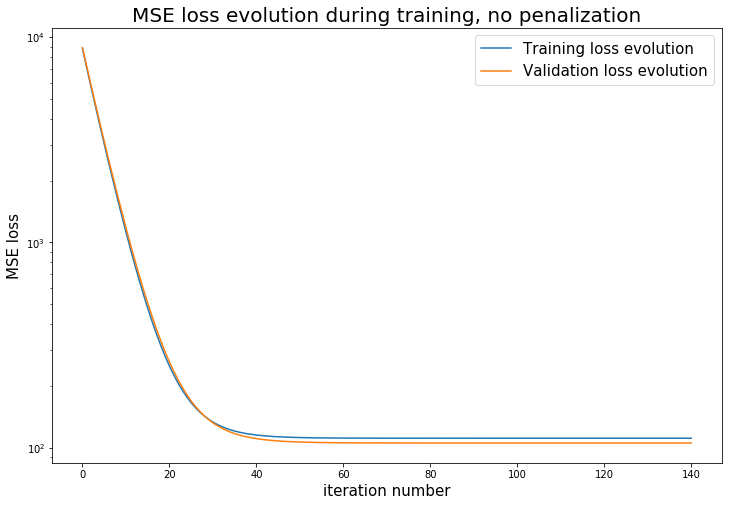

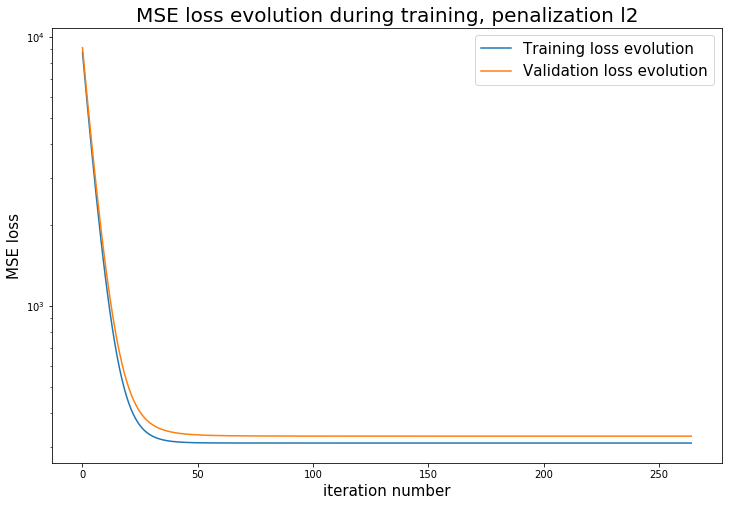

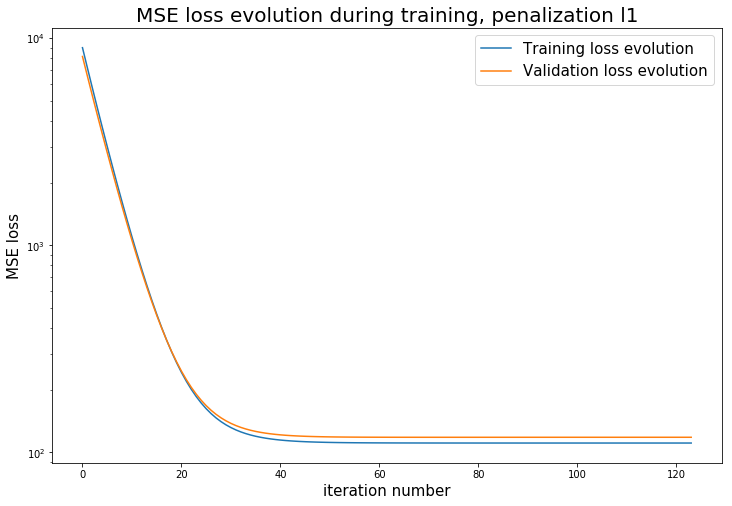

In [6]:
linear_regressor.plot_loss_history()
ridge_linear_regressor.plot_loss_history()
lasso_linear_regressor.plot_loss_history()

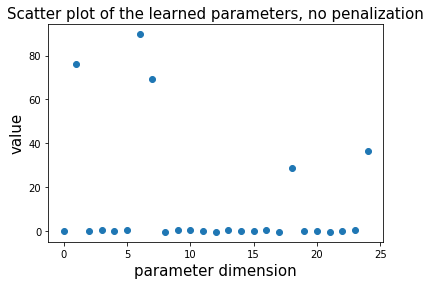

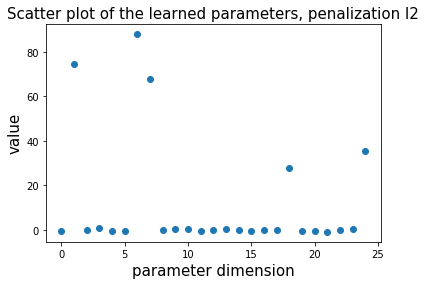

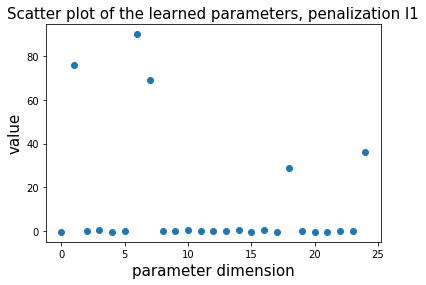

In [7]:
linear_regressor.plot_parameters()
ridge_linear_regressor.plot_parameters()
lasso_linear_regressor.plot_parameters()

## Questions:

#### - What are l1 and l2 penalization strategies useful for? Did you achieve to improve your model's performance with them? Try different penalization values.
 
L1 regularization does feature selection. It does this by assigning insignificant input features with zero weight and useful features with a non zero weight.
L2 regularization forces the weights to be small but does not make them zero and does non sparse solution. L2 is not robust to outliers as square terms blows up the error differences of the outliers and the regularization term tries to fix it by penalizing the weights. Ridge regression performs better when all the input features influence the output and all with weights are of roughly equal size.
Both penalization are usefull to avoid parameters to reach extreme values and avoid overfitting problem.

[Source](https://medium.com/datadriveninvestor/l1-l2-regularization-7f1b4fe948f2)


#### - Consider the parameters plot. What could you conclude about the features information?

We can conclude that only 5 parameters are relevant to fit the model, hence we can simplify and enhance it.

# II - Non linear unidimensional regression

## II a) - Loading the data

In [8]:
data = pd.read_csv('data/non_linear.csv', header=None)
X, Y = data.values[:, :-1], data.values[:, -1]
X, Y = X.reshape((Y.shape[0], 1)), Y.reshape((Y.shape[0], 1))

## II b) - Visualizing the data

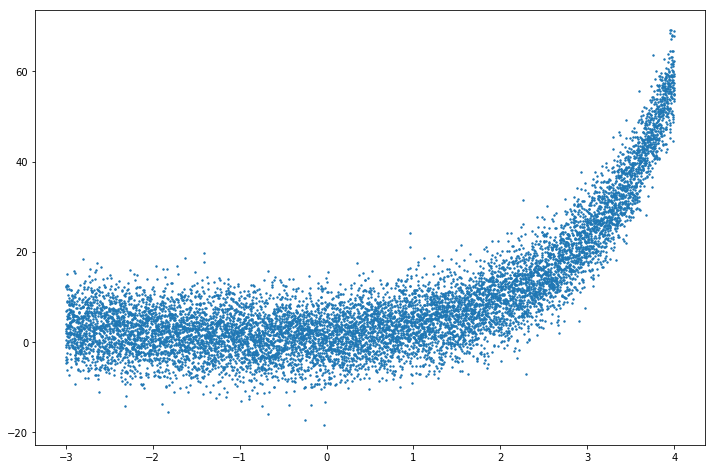

In [9]:
plt.figure(figsize=(12, 8))
plt.scatter(X, Y, s=2)
plt.show()

- Notice the relation between $X$ and $Y$ is non linear
- You are supposed to map X to a new non linear representation more suited to the type of dependance between $X$ and $y$
- Using this new representation of $X$ use the linear regressor properties from the beginning to perform predictions

In [10]:
class PolynomialRegressor(LinearRegressor):
    def __init__(self, X, Y, degree=2, penalization=None):
        self.degree = degree
        self.initial_X_tr, self.initial_X_val, _, _ = self.split_train_validation(X, Y)
        X_transformed = self.non_linear_mapping(X)
        super(PolynomialRegressor, self).__init__(X_transformed, Y, penalization)

    def split_train_validation(self, X, Y, test_size=0.25, seed=True):
        random_state = 42 if seed else np.random.randint(1e3)
        X_tr, X_val, Y_tr, Y_val = train_test_split(X, Y, test_size=test_size, random_state=random_state)
        return X_tr, X_val, Y_tr, Y_val

    # Must return a new features matrix based on a polynomial transformation
    def non_linear_mapping(self, X):
        # TODO:
        # Here do the mapping 
        new_X = X**0
        
        for i in range(1, self.degree+1):
            new_X = np.append(new_X,X**i, axis=1)
        
        return new_X
    
    def predict(self, X, apply_features_transformation=False):
        if apply_features_transformation:
            X_transformed = self.non_linear_mapping(X)
            return super(PolynomialRegressor, self).predict(X_transformed)
        else:
            return super(PolynomialRegressor, self).predict(X)
        
    def plot_prediction(self):
        assert self.initial_X_val.shape[1] == 1, "Too high dimensional design matrix to be plotted!"
        plt.figure(figsize=(12, 8))
        plt.scatter(self.initial_X_val, self.Y_val, s=5)
        plt.scatter(
            self.initial_X_val, self.predict(self.initial_X_val, apply_features_transformation=True), 
            color='red', s=5
        )
        plt.title("Prediction with polynomial regressor, degree={}".format(self.degree), fontsize=15)
        plt.show()

In [11]:
polynomial_regressor = PolynomialRegressor(X, Y, degree=2)
polynomial_regressor.fit(initial_step=1e-2, max_iterations=500, verbose=True)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
iteration number: 1	 training loss: 128.1452	 validation loss: 135.6129
iteration number: 2	 training loss: 66.0344	 validation loss: 70.0883
iteration number: 3	 training loss: 41.6730	 validation loss: 43.8093
iteration number: 4	 training loss: 31.9251	 validation loss: 32.9491
iteration number: 5	 training loss: 27.8711	 validation loss: 28.2353
iteration number: 6	 training loss: 26.0550	 validation loss: 26.0226
iteration number: 7	 training loss: 25.1308	 validation loss: 24.8587
iteration number: 8	 training loss: 24.5713	 validation loss: 24.1545
iteration number: 9	 training loss: 24.1684	 validation loss: 23.6653
iteration number: 10	 training loss: 23.8392	 validation loss: 23.2858
iteration number: 11	 training loss: 23.5502	 validation loss: 22.9687
iteration number: 12	 training loss: 23.2870	 validation loss: 22.6916
iteration number: 13	 training loss: 23.0435	 validation loss: 22.4427
iterat

iteration number: 233	 training loss: 18.9380	 validation loss: 18.6749
iteration number: 234	 training loss: 18.9379	 validation loss: 18.6748
iteration number: 235	 training loss: 18.9377	 validation loss: 18.6747
iteration number: 236	 training loss: 18.9376	 validation loss: 18.6746
iteration number: 237	 training loss: 18.9374	 validation loss: 18.6744
iteration number: 238	 training loss: 18.9373	 validation loss: 18.6743
iteration number: 239	 training loss: 18.9372	 validation loss: 18.6742
iteration number: 240	 training loss: 18.9371	 validation loss: 18.6742
iteration number: 241	 training loss: 18.9370	 validation loss: 18.6741
iteration number: 242	 training loss: 18.9369	 validation loss: 18.6740
iteration number: 243	 training loss: 18.9368	 validation loss: 18.6739
iteration number: 244	 training loss: 18.9367	 validation loss: 18.6739
iteration number: 245	 training loss: 18.9366	 validation loss: 18.6738
iteration number: 246	 training loss: 18.9366	 validation loss: 

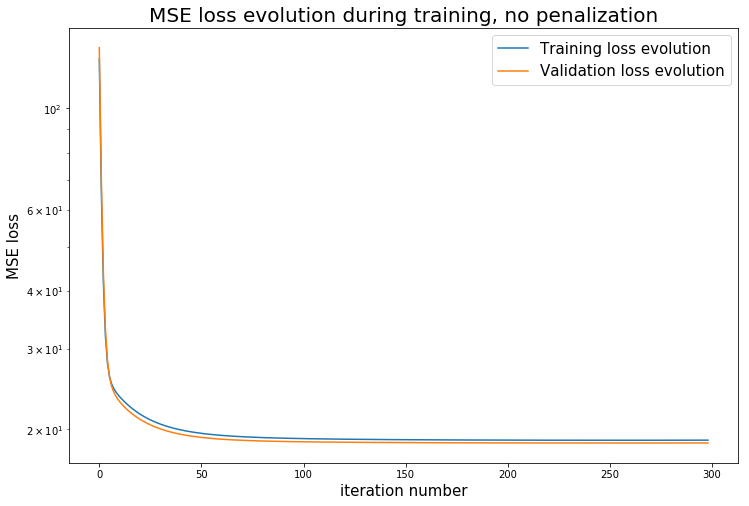

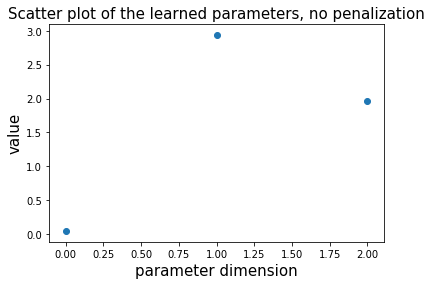

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


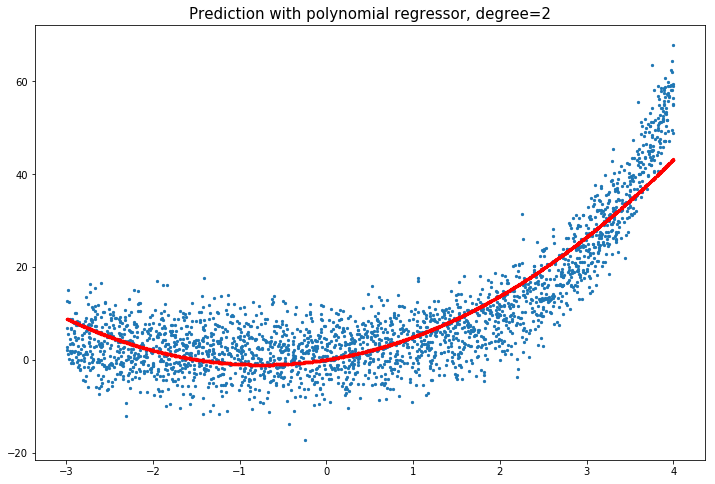

In [12]:
polynomial_regressor.plot_loss_history()
polynomial_regressor.plot_parameters()
polynomial_regressor.plot_prediction()

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
iteration number: 1	 training loss: 37.4079	 validation loss: 39.2650
iteration number: 2	 training loss: 35.6083	 validation loss: 37.3323
iteration number: 3	 training loss: 33.9803	 validation loss: 35.5803
iteration number: 4	 training loss: 32.5070	 validation loss: 33.9914
iteration number: 5	 training loss: 31.1731	 validation loss: 32.5496
iteration number: 6	 training loss: 29.9650	 validation loss: 31.2407
iteration number: 7	 training loss: 28.8703	 validation loss: 30.0519
iteration number: 8	 training loss: 27.8780	 validation loss: 28.9715
iteration number: 9	 training loss: 26.9781	 validation loss: 27.9893
iteration number: 10	 training loss: 26.1618	 validation loss: 27.0958
iteration number: 11	 training loss: 25.4209	 validation loss: 26.2826
iteration number: 12	 training loss: 24.7481	 validation loss: 25.5421
iteration number: 13	 training loss: 24.137

iteration number: 218	 training loss: 17.4645	 validation loss: 17.0782
iteration number: 219	 training loss: 17.4641	 validation loss: 17.0778
iteration number: 220	 training loss: 17.4637	 validation loss: 17.0774
iteration number: 221	 training loss: 17.4633	 validation loss: 17.0770
iteration number: 222	 training loss: 17.4629	 validation loss: 17.0767
iteration number: 223	 training loss: 17.4626	 validation loss: 17.0763
iteration number: 224	 training loss: 17.4622	 validation loss: 17.0760
iteration number: 225	 training loss: 17.4619	 validation loss: 17.0757
iteration number: 226	 training loss: 17.4615	 validation loss: 17.0754
iteration number: 227	 training loss: 17.4612	 validation loss: 17.0751
iteration number: 228	 training loss: 17.4609	 validation loss: 17.0748
iteration number: 229	 training loss: 17.4606	 validation loss: 17.0745
iteration number: 230	 training loss: 17.4603	 validation loss: 17.0742
iteration number: 231	 training loss: 17.4601	 validation loss: 

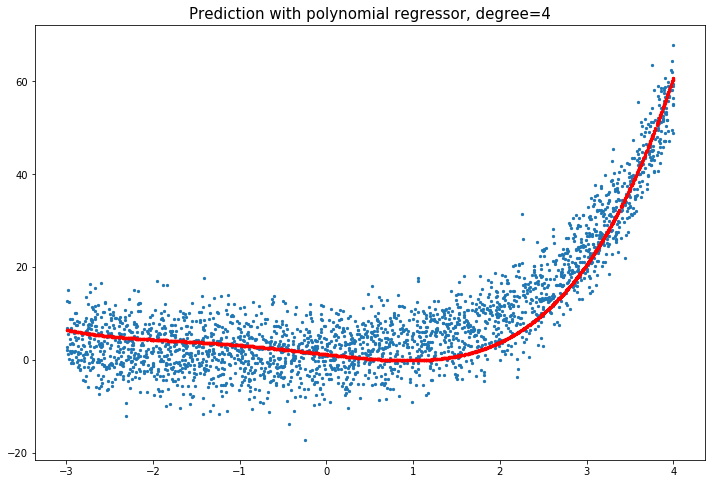

In [22]:
polynomial_regressor = PolynomialRegressor(X, Y, degree=4)
polynomial_regressor.fit(initial_step=1e-5, max_iterations=500)
polynomial_regressor.plot_prediction()

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
iteration number: 1	 training loss: 461.6176	 validation loss: 470.7251
iteration number: 2	 training loss: 424.4214	 validation loss: 432.6525
iteration number: 3	 training loss: 390.7710	 validation loss: 398.2180
iteration number: 4	 training loss: 360.3161	 validation loss: 367.0618
iteration number: 5	 training loss: 332.7422	 validation loss: 338.8608
iteration number: 6	 training loss: 307.7666	 validation loss: 313.3247
iteration number: 7	 training loss: 285.1353	 validation loss: 290.1925
iteration number: 8	 training loss: 264.6198	 validation loss: 269.2296
iteration number: 9	 training loss: 246.0147	 validation loss: 250.2251
iteration number: 10	 training loss: 229.1350	 validation loss: 232.9891
iteration number: 11	 training loss: 213.8143	 validation loss: 217.3508
iteration number: 12	 training loss: 199.9028	 validation loss: 203.1562
iteration number: 1

iteration number: 161	 training loss: 49.3095	 validation loss: 50.9148
iteration number: 162	 training loss: 49.2826	 validation loss: 50.8883
iteration number: 163	 training loss: 49.2560	 validation loss: 50.8621
iteration number: 164	 training loss: 49.2298	 validation loss: 50.8362
iteration number: 165	 training loss: 49.2039	 validation loss: 50.8107
iteration number: 166	 training loss: 49.1783	 validation loss: 50.7854
iteration number: 167	 training loss: 49.1530	 validation loss: 50.7605
iteration number: 168	 training loss: 49.1281	 validation loss: 50.7359
iteration number: 169	 training loss: 49.1035	 validation loss: 50.7116
iteration number: 170	 training loss: 49.0792	 validation loss: 50.6876
iteration number: 171	 training loss: 49.0552	 validation loss: 50.6640
iteration number: 172	 training loss: 49.0315	 validation loss: 50.6406
iteration number: 173	 training loss: 49.0082	 validation loss: 50.6175
iteration number: 174	 training loss: 48.9852	 validation loss: 

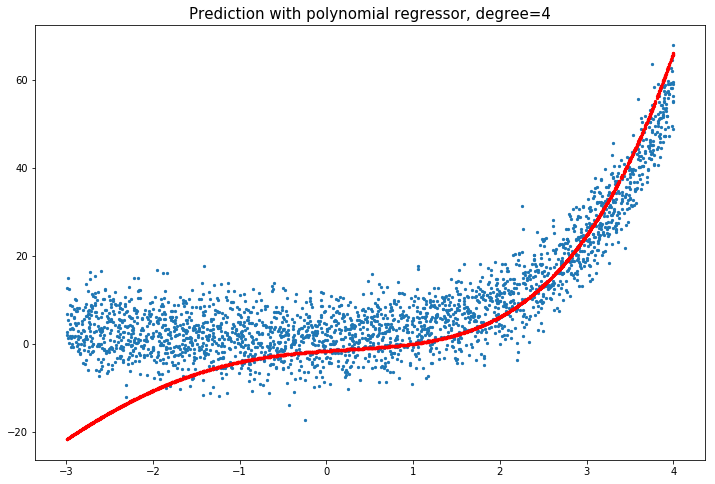

In [13]:
polynomial_regressor = PolynomialRegressor(X, Y, degree=4)
polynomial_regressor.fit(initial_step=1e-5, max_iterations=500, verbose=True)
polynomial_regressor.plot_prediction()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
iteration number: 1	 training loss: 7740710056468.9873	 validation loss: 8275007699417.0264
iteration number: 2	 training loss: 766770135131120640.0000	 validation loss: 819650248386957696.0000
iteration number: 3	 training loss: 75349307513102105837568.0000	 validation loss: 80545764918619176697856.0000
iteration number: 4	 training loss: 7345277832648939587185410048.0000	 validation loss: 7851844176065915217036443648.0000
iteration number: 5	 training loss: 710293819331863660955930640515072.0000	 validation loss: 759279160800676159115657977266176.0000
iteration number: 6	 training loss: 68132533165983345998826544819874037760.0000	 validation loss: 72831286430386178550821682827612913664.0000
iteration number: 7	 training loss: 6482513963392408031323220161515767092740096.0000	 validation loss: 692957988376295147140959396336440727253

C:\Users\Emmanuel\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in double_scalars


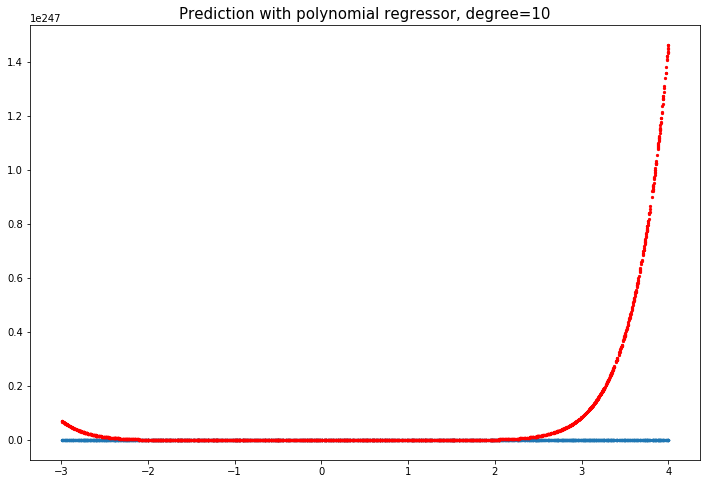

In [28]:
polynomial_regressor = PolynomialRegressor(X, Y, degree=10)
polynomial_regressor.fit(initial_step=1e-8, max_iterations=500, verbose=True)
polynomial_regressor.plot_prediction()

## Questions:
#### - Did you succeed to fit the data using a non linear mapping transformation?
Yes, it seems
#### - Try different degrees, which one leads you to the best validation error?
We tried with different degrees. We also tried with different large values (100), the model can be very unstable, but sometimes we have a good model with 4/5 degrees. 

# III - Logistic regression

## III a) - Loading the data

In [29]:
data = pd.read_csv('data/breast_cancer_classification.csv', header=None)
X, Y = data.values[:, :-1], data.values[:, -1]
Y = Y.reshape((Y.shape[0], 1))

## III b) - Problem definition

Using the sigmoid function $\sigma(x)$ defined as:

$\sigma(x) = \frac{1}{1 + \exp(-x)}$

We can define our binary cross-entropy cost function $J(\theta)$ as follows:
$$
J(\mathbf{X}, \mathbf{Y}; \theta) = -\frac{1}{n} \sum_{i=1}^n Y_i \log \sigma(\mathbf{X_i}\mathbf{\theta}) + (1 - Y_i) \log (1 - \sigma(\mathbf{X_i} \mathbf{\theta})),
$$
with $\mathbf{Y} = [y_1 \cdots y_n]$, $\mathbf{X} = [\mathbf{x_1} \cdots \mathbf{x_n}]$,

$\mathbf{Y} \in \mathbb{R}^{n\times{1}}$ being the vector of labels, $\mathbf{X} \in \mathbb{R}^{n\times{p}}$ being the vector of features, $\mathbf{\theta} \in \mathbb{R}^{p\times{1}}$ being our parameters, and $n$ the number of samples.

Now we can calculate the gradient $\nabla J(\mathbf{\theta})$:
$$
\nabla_{\theta} J(\mathbf{X}, \mathbf{Y})^T = - \frac{1}{n} \sum_{i=1}^n \mathbf{X_i}(Y_i - \sigma(\mathbf{X_i}\mathbf{\theta}))
$$
$$
\nabla_{\theta} J(\mathbf{X}, \mathbf{Y}) = - \frac{1}{n} \mathbf{X}^T(\mathbf{Y} - \sigma(\mathbf{X}\theta))
$$

It leads us to the gradient descend (GD) iterative algorithm:
$$
\mathbf{\theta}_{t+1} := \mathbf{\theta}_{t} - \eta_t \nabla_{\theta} J(\mathbf{X}, \mathbf{Y})
$$

And finally, our linear prediction $\mathbf{\hat{Y}}$ can be expressed as:
$$
\mathbf{\hat{Y}} = \sigma(\mathbf{X}\mathbf{\theta})
$$
- **no $\mathbf{\hat{Y}}_i$ should reach $0$ or $1$. If it does get rounded to $0$ or $1$, prevent that from happening by adding or removing EPSILON to $\mathbf{\hat{Y}}_i$**

In [30]:
# Logistic Regression being a GLM, we can make an inheritance from the LinearRegressor class
class LogisticRegressor(LinearRegressor):
    def __init__(self, X, Y, penalization=None):
        super(LogisticRegressor, self).__init__(X, Y, penalization)
        self.X_tr, self.X_val = self.normalize(self.X_tr), self.normalize(self.X_val)
    
    # Return a normalized matrix with standardized features 0 mean 1 std
    def normalize(self, X):
        #TODO:
        X -= np.mean(X, axis=0)
        try:
            X /= np.std(X, axis=0)
        except ZeroDivisionError as e:
            X /= np.std(X, axis=0) + 0.00000001
            
        return X
    
    # Return the model's accuracy on the validation dataset
    def accuracy_on_validation(self):
        # TODO:
        count_tot, count = 0,0
        y_pred = np.round(self.predict(self.X_val), decimals=0)
        for y in range(y_pred.shape[0]) :
            count_tot+=1
            if y_pred[y]-self.Y_val[y] == 0: 
                count+=1
        
        return count/count_tot
        
    # Sigmoid function
    def sigmoid(self, X):
        # TODO:
        return 1/ (1 + np.exp(-X))

    def predict(self, X, apply_normalization=False):
        if apply_normalization:
            X = self.normalize(X)
        return self.sigmoid(X.dot(self.theta))

    def compute_grad(self, X, Y, loss='CE'):
        """Binary cross-entropy gradient"""
        assert(X.shape[0] == Y.shape[0])
        n = X.shape[0]
        if loss == 'CE':
            # TODO:
            grad = (-1/n)*X.T.dot(Y-self.predict(X))
            if self.penalization == 'l2':
                # TODO:
                grad += 2*self.gamma*self.theta
            if self.penalization == 'l1':
                # TODO:
                grad += np.sign(self.gamma)
        else:
            raise NotImplementedError
        return grad

    def step_gradient_descent(self, step, X, Y):
        self.grad_theta = self.compute_grad(X, Y, loss='CE')
        # TODO:
        self.theta -= step * self.grad_theta
        pass
    
    # Must return the given loss, penalized or not, for Y_true and Y_pred as inputs
    def loss(self, Y_true, Y_pred, loss='CE'):
        """Binary cross-entropy loss"""
        assert(Y_true.shape[0] == Y_pred.shape[0])
        n = Y_true.shape[0]
        if loss == 'CE':
            # TODO:
            loss = -np.mean(Y_true*np.log(Y_pred+EPSILON)+(1-Y_true)*np.log(1-Y_pred+EPSILON))
            if self.penalization == 'l2':
                # TODO:
                loss += self.gamma * np.linalg.norm(self.theta, ord=2) ** 2
            elif self.penalization == 'l1':
                # TODO:
                loss += self.gamme * np.linalg.norm(self.theta, ord=1)
        else:
            raise NotImplementedError
        return loss

iteration number: 1	 training loss: 0.6633	 validation loss: 0.8248
iteration number: 2	 training loss: 0.6042	 validation loss: 0.7422
iteration number: 3	 training loss: 0.5560	 validation loss: 0.6745
iteration number: 4	 training loss: 0.5166	 validation loss: 0.6188
iteration number: 5	 training loss: 0.4839	 validation loss: 0.5724
iteration number: 6	 training loss: 0.4566	 validation loss: 0.5333
iteration number: 7	 training loss: 0.4335	 validation loss: 0.5000
iteration number: 8	 training loss: 0.4137	 validation loss: 0.4714
iteration number: 9	 training loss: 0.3965	 validation loss: 0.4466
iteration number: 10	 training loss: 0.3815	 validation loss: 0.4249
iteration number: 11	 training loss: 0.3683	 validation loss: 0.4059
iteration number: 12	 training loss: 0.3564	 validation loss: 0.3889
iteration number: 13	 training loss: 0.3458	 validation loss: 0.3737
iteration number: 14	 training loss: 0.3361	 validation loss: 0.3600
iteration number: 15	 training loss: 0.3273

iteration number: 312	 training loss: 0.0971	 validation loss: 0.0565
iteration number: 313	 training loss: 0.0970	 validation loss: 0.0565
iteration number: 314	 training loss: 0.0969	 validation loss: 0.0564
iteration number: 315	 training loss: 0.0968	 validation loss: 0.0563
iteration number: 316	 training loss: 0.0967	 validation loss: 0.0563
iteration number: 317	 training loss: 0.0966	 validation loss: 0.0562
iteration number: 318	 training loss: 0.0965	 validation loss: 0.0561
iteration number: 319	 training loss: 0.0964	 validation loss: 0.0561
iteration number: 320	 training loss: 0.0963	 validation loss: 0.0560
iteration number: 321	 training loss: 0.0962	 validation loss: 0.0559
iteration number: 322	 training loss: 0.0961	 validation loss: 0.0559
iteration number: 323	 training loss: 0.0960	 validation loss: 0.0558
iteration number: 324	 training loss: 0.0959	 validation loss: 0.0557
iteration number: 325	 training loss: 0.0958	 validation loss: 0.0557
iteration number: 32

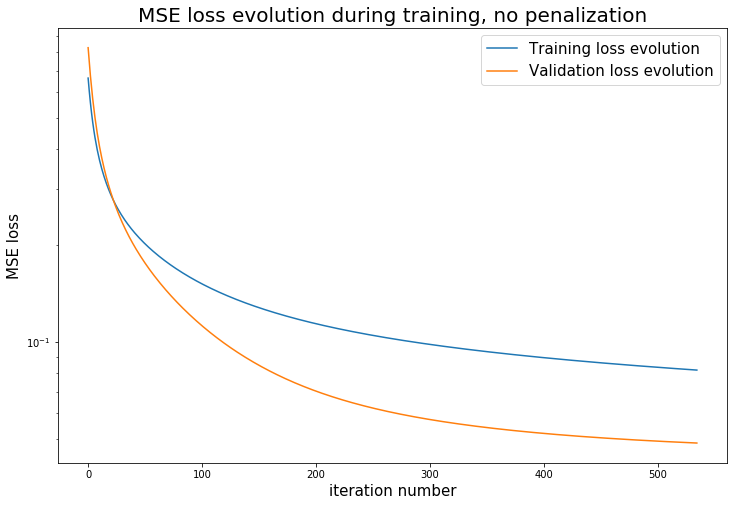

In [31]:
logistic_regressor = LogisticRegressor(X, Y)
logistic_regressor.fit(max_iterations=1000, initial_step=1e-1, step_decay=False)
logistic_regressor.plot_loss_history()

In [32]:
print(logistic_regressor.accuracy_on_validation())

0.9790209790209791


## Questions:
#### - Describe your normalization strategy and why it is important

We center our columns and giver them a standart deviation of 1. It is important because the range of each column is very different and if we do not normalize them, some columns will influence the result more, but this doesn’t necessarily mean it is more important as a predictor.

#### - Why do we need a different loss function for a classification problem (why not MSE again?)

The MSE is not relevant for classification because it will not be convex. But with cross entropy log loss it is. 
Moreover if the incorrect output is predicted, the loss will only be equal to 1, but with cross entrpy log, it will tends toward infinity.

#### - Why is the normalization particulary relevant in this case? Compare the performances with and without it. Comment.

We apply the same learning rate to all components of the gradient, however, we have a lot of different scales for each feature, and it is much more difficult to fit the model.